# Decision Tree Classification Examples

Will utilize the **ClassificationDecisionTree** from **DecisionTree.py** to classify a set of example data.

See specifics on the decision tree code here: https://github.com/dadler6/RF/blob/master/src/DecisionTree.py

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
sys.path.insert(0, '../src')

In [3]:
from DecisionTree import *

In [4]:
%matplotlib inline

## Data upload and EDA

For this test we will utilize the Iris dataset, which is included in the [sklearn library](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In [5]:
from sklearn import datasets

In [6]:
iris = datasets.load_iris()

In [7]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.get_dummies(iris.target)
y.columns = iris.target_names

In [8]:
print("Number of training samples: " + str(X.shape[0]))
print("Setosa breakdown (y,n): (" + str(y['setosa'].sum()) + ',' + str(len(y) - y['setosa'].sum()) + ')')
print("Setosa breakdown (y,n): (" + str(y['setosa'].sum()) + ',' + str(len(y) - y['setosa'].sum()) + ')')
print("Versicolor breakdown (y,n): (" + str(y['versicolor'].sum()) + ',' + str(len(y) - y['versicolor'].sum()) + ')')
print("Virginica breakdown (y,n): (" + str(y['virginica'].sum()) + ',' + str(len(y) - y['virginica'].sum()) + ')')

Number of training samples: 150
Setosa breakdown (y,n): (50,100)
Setosa breakdown (y,n): (50,100)
Versicolor breakdown (y,n): (50,100)
Virginica breakdown (y,n): (50,100)


#### Look at sepal length vs. width, petal length vs. width for each flower type

In [9]:
# Copy the X to add the target on and get a hue
X_w_target = X.copy()
X_w_target['Flower'] = iris.target
X_w_target.Flower = X_w_target.Flower.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

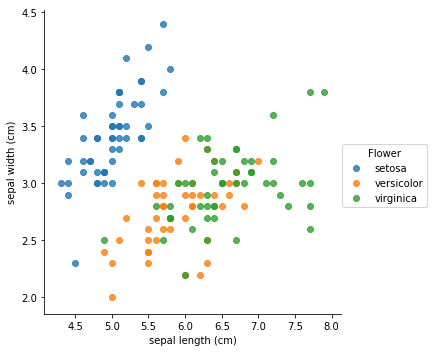

In [10]:
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', data=X_w_target, hue='Flower', fit_reg=False)

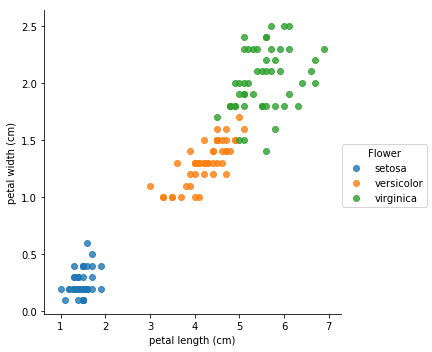

In [11]:
sns.lmplot(x='petal length (cm)', y='petal width (cm)', data=X_w_target, hue='Flower', fit_reg=False)

Clear relationship where petal length goes up with petal width.  There is a lot of overlapping characteristics between versicolor and virginica.

## Data cleaning

#### Use PCA since there seems to be a trend

Will use the sklearn PCA library

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X))
X_pca.columns = ['PCA_0', 'PCA_1']

Look at dimensionality reduction with PCA

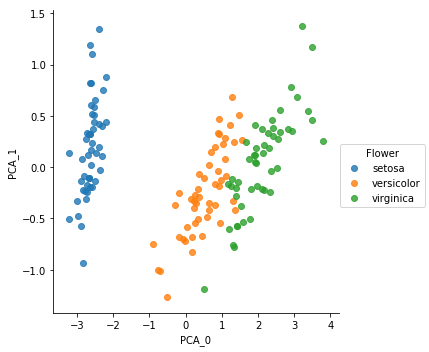

In [14]:
# Copy the X to add the target on and get a hue
X_pca_w_target = X_pca.copy()
X_pca_w_target['Flower'] = iris.target
X_pca_w_target.Flower = X_pca_w_target.Flower.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
sns.lmplot(x='PCA_0', y='PCA_1', data=X_pca_w_target, hue='Flower', fit_reg=False)

#### Separate out the test/train sets for each group

Will use the sklearn test/train split for this.

In [15]:
from sklearn.model_selection import train_test_split

Will split using a test = 0.67, train = 0.33 split.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.33, random_state=42
)

In [17]:
X_train_setosa = X_train.copy()
y_train_setosa = y_train['setosa'].copy()

X_test_setosa = X_test.copy()
y_test_setosa = y_test['setosa'].copy()

# Print sizes
print(
    "Setosa train breakdown (y,n): (" + str(y_train_setosa.sum()) 
     + ',' + str(len(y_train_setosa) - y_train_setosa.sum()) + ')'
)

print(
    "Setosa test breakdown (y,n): (" + str(y_test_setosa.sum()) 
     + ',' + str(len(y_test_setosa) - y_test_setosa.sum()) + ')'
)

Setosa train breakdown (y,n): (31,69)
Setosa test breakdown (y,n): (19,31)


In [18]:
X_train_versicolor = X_train.copy()
y_train_versicolor = y_train['versicolor'].copy()

X_test_versicolor = X_test.copy()
y_test_versicolor = y_test['versicolor'].copy()

# Print sizes
# Print sizes
print(
    "Versicolor train breakdown (y,n): (" + str(y_train_versicolor.sum()) 
     + ',' + str(len(y_train_versicolor) - y_train_versicolor.sum()) + ')'
)

print(
    "Versicolor test breakdown (y,n): (" + str(y_test_versicolor.sum()) 
     + ',' + str(len(y_test_versicolor) - y_test_versicolor.sum()) + ')'
)

Versicolor train breakdown (y,n): (35,65)
Versicolor test breakdown (y,n): (15,35)


In [19]:
X_train_virginica = X_train.copy()
y_train_virginica = y_train['virginica'].copy()

X_test_virginica = X_test.copy()
y_test_virginica = y_test['virginica'].copy()

# Print sizes
print(
    "Virginica train breakdown (y,n): (" + str(y_train_virginica.sum()) 
     + ',' + str(len(y_train_virginica) - y_train_virginica.sum()) + ')'
)

print(
    "Virginica test breakdown (y,n): (" + str(y_test_virginica.sum()) 
     + ',' + str(len(y_test_virginica) - y_test_virginica.sum()) + ')'
)

Virginica train breakdown (y,n): (34,66)
Virginica test breakdown (y,n): (16,34)


Looking at a general 2/3, 1/3 split between positive/negative cases, which follows the actual split.

## Fit models

Make a classification decision tree, at first using:

* Gini impurity
* pure termination (i.e. every leaf node must have the same class)
* No pruning

In [20]:
# Initialize trees
DT_gini_pure_setosa = ClassificationDecisionTree(split_type='gini', terminate='pure', prune=False)
DT_gini_pure_versicolor = ClassificationDecisionTree(split_type='gini', terminate='pure', prune=False)
DT_gini_pure_virginica = ClassificationDecisionTree(split_type='gini', terminate='pure', prune=False)

# Fit
DT_gini_pure_setosa.fit(X_train_setosa, y_train_setosa)
DT_gini_pure_versicolor.fit(X_train_versicolor, y_train_versicolor)
DT_gini_pure_virginica.fit(X_train_virginica, y_train_virginica)

# Predict
y_predict_setosa = DT_gini_pure_setosa.predict(X_test_setosa)
y_predict_versicolor = DT_gini_pure_versicolor.predict(X_test_versicolor)
y_predict_virginica = DT_gini_pure_virginica.predict(X_test_virginica)

Will use an F1 score to determine how well the prediction is, specifically sklearn.metrics.f1_score.

$$F1 = 2 * \left(\frac{precision * recall}{precision + recall}\right)$$

where 

$$precision = \frac{TP}{TP + FP}$$

$$recall = \frac{TP}{TP + FN}$$

In [21]:
from sklearn.metrics import f1_score

In [22]:
gini_pure_f1_setosa = f1_score(y_test_setosa, y_predict_setosa)
gini_pure_f1_versicolor = f1_score(y_test_versicolor, y_predict_versicolor)
gini_pure_f1_virginica = f1_score(y_test_virginica, y_predict_virginica)

print('F1 setosa: ' + str(gini_pure_f1_setosa))
print('F1 versicolor: ' + str(gini_pure_f1_versicolor))
print('F1 virginica: ' + str(gini_pure_f1_virginica))

F1 setosa: 1.0
F1 versicolor: 0.967741935484
F1 virginica: 0.967741935484


Now look at confusion matrix.

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
gini_pure_confusion_setosa = confusion_matrix(y_test_setosa, y_predict_setosa)
gini_pure_confusion_versicolor = confusion_matrix(y_test_versicolor, y_predict_versicolor)
gini_pure_confusion_virginica = confusion_matrix(y_test_virginica, y_predict_virginica)

print('Setosa Confusion')
print(gini_pure_confusion_setosa)
print()

print('Versicolor Confusion')
print(gini_pure_confusion_versicolor)
print()

print('Virginica Confusion')
print(gini_pure_confusion_virginica)
print()

Setosa Confusion
[[31  0]
 [ 0 19]]

Versicolor Confusion
[[34  1]
 [ 0 15]]

Virginica Confusion
[[34  0]
 [ 1 15]]



One false positive exists for versicolor, and one false negative for virginica.

#### Add pruning

In [25]:
# Initialize trees
DT_gini_pure_prune_setosa = ClassificationDecisionTree(split_type='gini', terminate='pure', prune=True)
DT_gini_pure_prune_versicolor = ClassificationDecisionTree(split_type='gini', terminate='pure', prune=True)
DT_gini_pure_prune_virginica = ClassificationDecisionTree(split_type='gini', terminate='pure', prune=True)

# Fit
DT_gini_pure_prune_setosa.fit(X_train_setosa, y_train_setosa)
DT_gini_pure_prune_versicolor.fit(X_train_versicolor, y_train_versicolor)
DT_gini_pure_prune_virginica.fit(X_train_virginica, y_train_virginica)

# Predict
y_predict_setosa_prune = DT_gini_pure_prune_setosa.predict(X_test_setosa)
y_predict_versicolor_prune = DT_gini_pure_prune_versicolor.predict(X_test_versicolor)
y_predict_virginica_prune = DT_gini_pure_prune_virginica.predict(X_test_virginica)

Confusion matrix reporting

In [26]:
gini_pure_prune_confusion_setosa = confusion_matrix(y_test_setosa, y_predict_setosa_prune)
gini_pure_prune_confusion_versicolor = confusion_matrix(y_test_versicolor, y_predict_versicolor_prune)
gini_pure_prune_confusion_virginica = confusion_matrix(y_test_virginica, y_predict_virginica_prune)

print('Setosa Confusion')
print(gini_pure_prune_confusion_setosa)
print()

print('Versicolor Confusion')
print(gini_pure_prune_confusion_versicolor)
print()

print('Virginica Confusion')
print(gini_pure_prune_confusion_virginica)
print()

Setosa Confusion
[[31  0]
 [ 0 19]]

Versicolor Confusion
[[34  1]
 [ 0 15]]

Virginica Confusion
[[34  0]
 [ 1 15]]



#### Try with gain ratio, no pruning

In [27]:
# Initialize trees
DT_gain_pure_setosa = ClassificationDecisionTree(split_type='gain_ratio', terminate='pure', prune=False)
DT_gain_pure_versicolor = ClassificationDecisionTree(split_type='gain_ratio', terminate='pure', prune=False)
DT_gain_pure_virginica = ClassificationDecisionTree(split_type='gain_ratio', terminate='pure', prune=False)

# Fit
DT_gain_pure_setosa.fit(X_train_setosa, y_train_setosa)
DT_gain_pure_versicolor.fit(X_train_versicolor, y_train_versicolor)
DT_gain_pure_virginica.fit(X_train_virginica, y_train_virginica)

# Predict
y_predict_gain_setosa = DT_gain_pure_setosa.predict(X_test_setosa)
y_predict_gain_versicolor = DT_gain_pure_versicolor.predict(X_test_versicolor)
y_predict_gain_virginica = DT_gain_pure_virginica.predict(X_test_virginica)

Confusion matrix reporting

In [28]:
gini_gain_confusion_setosa = confusion_matrix(y_test_setosa, y_predict_gain_setosa)
gini_gain_confusion_versicolor = confusion_matrix(y_test_versicolor, y_predict_gain_versicolor)
gini_gain_confusion_virginica = confusion_matrix(y_test_virginica, y_predict_gain_virginica)

print('Setosa Confusion')
print(gini_gain_confusion_setosa)
print()

print('Versicolor Confusion')
print(gini_gain_confusion_versicolor)
print()

print('Virginica Confusion')
print(gini_gain_confusion_virginica)
print()

Setosa Confusion
[[31  0]
 [ 0 19]]

Versicolor Confusion
[[34  1]
 [ 0 15]]

Virginica Confusion
[[34  0]
 [ 1 15]]



It is still the same effect.  Looking at the 2D plot, it might make sense to actually collapse the PCA to one dimension.  First, one can look at what is the false positive/negative

In [29]:
X_test_versicolor[y_predict_gain_versicolor != y_test_versicolor]

,PCA_0,PCA_1
146,1.525664,-0.375021


In [30]:
X_test_virginica[y_predict_gain_virginica != y_test_virginica]

,PCA_0,PCA_1
146,1.525664,-0.375021


Oddly enough, it is the same point being misclassified.  It appears that something that should be classified as Virginica, is being classified as Versicolor.

#### Collapse data into one-dimension

In [31]:
pca_1D = PCA(n_components=1)
X_pca_1D = pd.DataFrame(pca_1D.fit_transform(X))
X_pca_1D.columns = ['PCA_0']

Can use a swarm plot to visualize the 1D data.

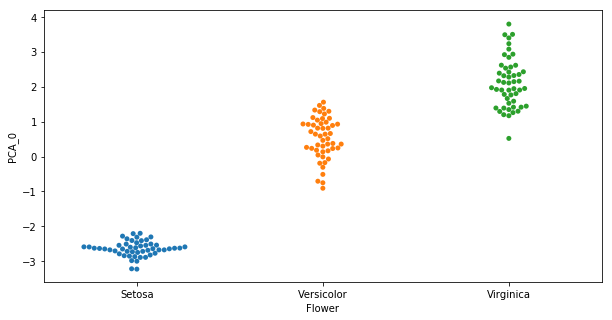

In [38]:
# Copy the X to add the target and make the swarmplot
fig = plt.figure(figsize=(10, 5))
X_pca_1D_w_target = X_pca_1D.copy()
X_pca_1D_w_target['Flower'] = iris.target
X_pca_1D_w_target.Flower = X_pca_1D_w_target.Flower.map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})
sns.swarmplot(x='Flower', y='PCA_0', data=X_pca_1D_w_target)

Looking at it in 1D, the classification is actually just an outlier in Virginica, being misclassified as versicolor.